In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
yf.pdr_override()

In [4]:
symbol = 'AMD'
start = '2021-08-20'
end = '2022-08-20'
data = yf.download(symbol,start,end)
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-15,100.510002,101.849998,99.800003,101.010002,101.010002,61327100
2022-08-16,100.839996,101.449997,98.320000,100.199997,100.199997,60220700
2022-08-17,99.260002,99.639999,96.730003,98.269997,98.269997,63735600
2022-08-18,97.739998,101.070000,96.730003,100.440002,100.440002,76059500
2022-08-19,98.669998,99.250000,94.589996,95.949997,95.949997,67167500


In [20]:
!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   380  100   380    0     0   3333      0 --:--:-- --:--:-- --:--:--  3333
100   353  100   353    0     0   1626      0 --:--:-- --:--:-- --:--:--  1626
100 1299k  100 1299k    0     0  1080k      0  0:00:01  0:00:01 --:--:-- 1358k
ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/outpu

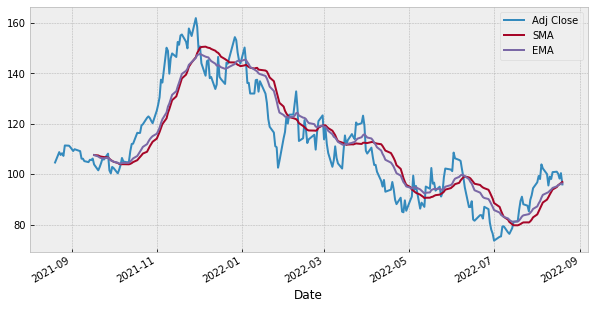

In [21]:
import talib as ta
data['SMA'] = ta.SMA(data['Adj Close'], timeperiod = 20)
data['EMA'] = ta.EMA(data['Adj Close'], timeperiod = 20)
data[['Adj Close','SMA','EMA']].plot(figsize=(10,5))
plt.show()

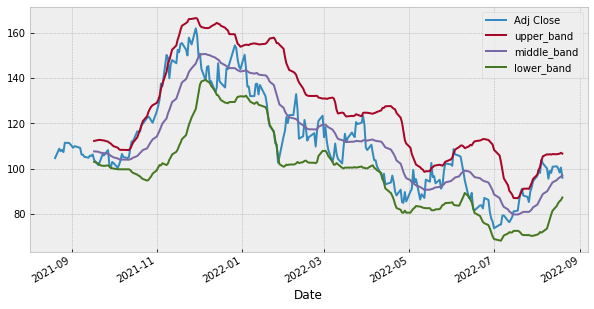

In [22]:
data['upper_band'], data['middle_band'], data['lower_band'] = ta.BBANDS(data['Adj Close'], timeperiod =20)
data[['Adj Close','upper_band','middle_band','lower_band']].plot(figsize=(10,5))
plt.show()

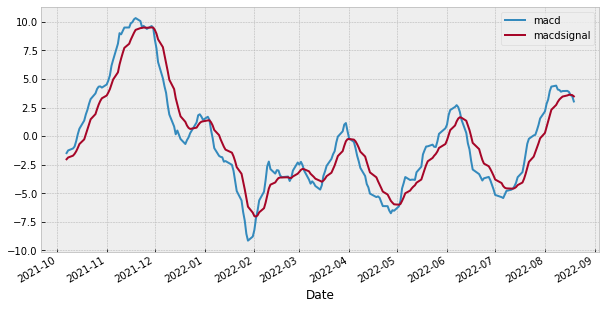

In [23]:
data['macd'], data['macdsignal'], data['macdhist'] = ta.MACD(data['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)
data[['macd','macdsignal']].plot(figsize=(10,5))
plt.show()

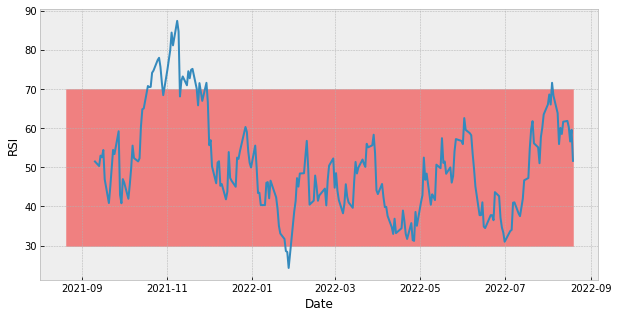

In [25]:
data['RSI'] = ta.RSI(data['Adj Close'], timeperiod=14)
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(data.index, data.RSI, label='RSI')
ax.fill_between(data.index, y1=30, y2=70, color = 'lightcoral')
ax.set_xlabel('Date')
ax.set_ylabel('RSI')
plt.show()

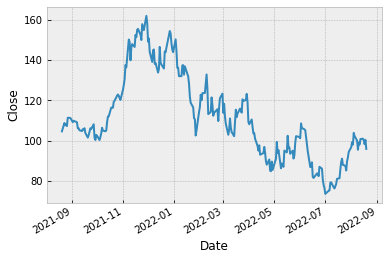

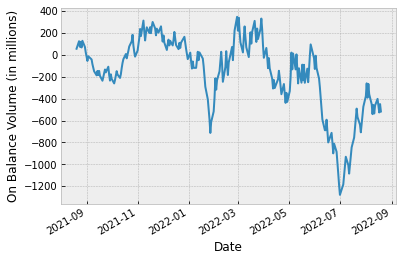

In [26]:
data['OBV'] = ta.OBV(data['Adj Close'], data['Volume'])/10**6
data['Adj Close'].plot()
plt.ylabel('Close')
plt.show()
data.OBV.plot()
plt.ylabel('On Balance Volume (in millions)')
plt.show()